## Observations and Insights

## Dependencies and starter code

In [198]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [185]:
# Making an array of all the drug regimens
mouse_study_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [186]:
#split up data into groups based on drug regimen
# Find Tumor Volume(mm3) mean
drug_groups = mouse_study_df.groupby(['Drug Regimen'])
drug_mouse_df = drug_groups.mean()
drug_mouse_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [187]:
# Find Tumor Volume(mm3) median
drug_groups = mouse_study_df.groupby(['Drug Regimen'])
drug_mouse_df = drug_groups.median()
drug_mouse_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,16.5,20.5,20.0,41.557809,0.0
Ceftamin,12.0,28.0,20.0,51.776157,1.0
Infubinol,20.0,27.0,15.0,51.820584,1.0
Ketapril,18.0,28.0,20.0,53.698743,1.0
Naftisol,9.0,27.0,20.0,52.509285,1.0
Placebo,10.0,28.0,15.0,52.288934,1.0
Propriva,8.0,26.0,15.0,50.854632,1.0
Ramicane,9.0,19.0,20.0,40.673236,0.0
Stelasyn,14.0,28.0,20.0,52.431737,1.0


In [188]:
# Find Tumor Volume(mm3) varience
drug_groups = mouse_study_df.groupby(['Drug Regimen'])
drug_mouse_df = drug_groups.var()
drug_mouse_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,59.620372,7.466034,206.928043,24.947764,0.720790
Ceftamin,65.147591,2.501016,204.031772,39.290177,1.402527
Infubinol,56.404272,4.769028,181.534470,43.128684,1.054942
Ketapril,36.236432,3.392536,196.839089,68.553577,1.942883
Naftisol,45.102703,2.247748,201.208951,66.173479,1.479919
Placebo,40.384837,3.378146,192.954266,61.168083,1.792449
Propriva,53.357531,2.791848,181.506211,42.351070,1.174379
Ramicane,35.362393,10.465318,203.796178,23.486704,0.477838
Stelasyn,63.036648,2.701473,191.620626,59.450562,0.944874


In [189]:
# Find Tumor Volume(mm3) standard deviation
drug_groups = mouse_study_df.groupby(['Drug Regimen'])
drug_mouse_df = drug_groups.std()
drug_mouse_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.721423,2.732404,14.384994,4.994774,0.848993
Ceftamin,8.071406,1.581460,14.283969,6.268188,1.184283
Infubinol,7.510278,2.183810,13.473473,6.567243,1.027104
Ketapril,6.019670,1.841884,14.029935,8.279709,1.393873
Naftisol,6.715855,1.499249,14.184814,8.134708,1.216519
Placebo,6.354907,1.837973,13.890798,7.821003,1.338824
Propriva,7.304624,1.670882,13.472424,6.507770,1.083688
Ramicane,5.946629,3.235014,14.275720,4.846308,0.691259
Stelasyn,7.939562,1.643616,13.842710,7.710419,0.972046


In [190]:
# Find Tumor Volume(mm3) standard error
drug_groups = mouse_study_df.groupby(['Drug Regimen'])
drug_mouse_df = drug_groups.sem()
drug_mouse_df

,Age_months,Metastatic Sites,Mouse ID,Sex,Timepoint,Tumor Volume (mm3),Weight (g)
Drug Regimen,,,,,,,
Capomulin,0.509136,0.055981,NaN,NaN,0.948518,0.329346,0.180169
Ceftamin,0.604977,0.088766,NaN,NaN,1.070629,0.469821,0.118535
Infubinol,0.562919,0.076985,NaN,NaN,1.009879,0.492236,0.163684
Ketapril,0.439030,0.101659,NaN,NaN,1.023238,0.603860,0.134333
Naftisol,0.492430,0.089200,NaN,NaN,1.040081,0.596466,0.109930
Placebo,0.472356,0.099514,NaN,NaN,1.032495,0.581331,0.136615
Propriva,0.575685,0.085407,NaN,NaN,1.061776,0.512884,0.131684
Ramicane,0.393825,0.045780,NaN,NaN,0.945433,0.320955,0.214244
Stelasyn,0.590143,0.072252,NaN,NaN,1.028921,0.573111,0.122169


## Bar plots

In [191]:
# Total mice per drug regimen
mice_total_df = mouse_study_df["Drug Regimen"].value_counts()
mice_total_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Mouse count')

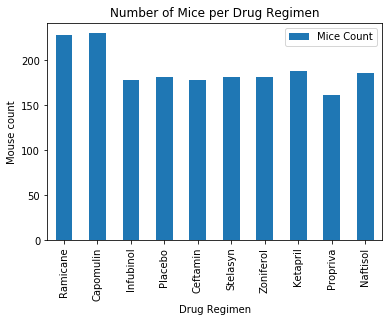

In [192]:
mice_total_df = pd.DataFrame({'Drug Regimen': ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
                                                    'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
                                   'Mice Count': [228, 230, 178, 181, 178, 181, 182, 188, 161, 186]})


ax = mice_total_df.plot.bar(x='Drug Regimen', y='Mice Count')
# Give the chart a title, x label, and y label
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse count")

Text(0, 0.5, 'Mouse count')

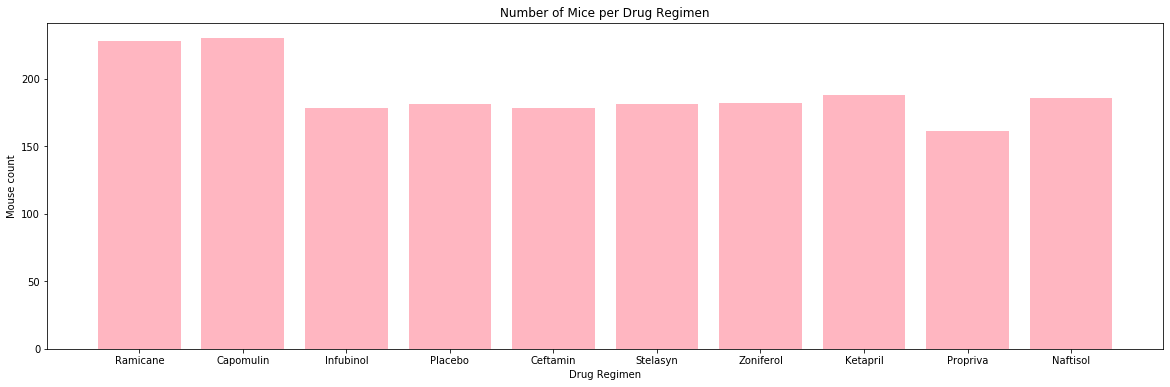

In [193]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# AKA sum of mice per drug

# Labels based off of Drug Regimens listed in the study
drugs = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

# Mice count per Drug Regimen in the study
mice_count = [228, 230, 178, 181, 178, 181, 182, 188, 161, 186]

# Setting figure size
plt.figure(figsize=(20,6))

# Creating bar chart based on values above.
plt.bar(x_axis, mice_count, color="lightpink", align="center")
plt.xticks(tick_locations, drugs)

# Give the chart a title, x label, and y label
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse count")

## Pie plots

In [194]:
# Total female and male mice in study
mouse_study_df['Sex'].value_counts()

Male      958
Female    935
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Percentage of Female & Male Mice in Study')

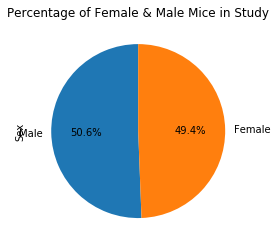

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_study_df['Sex'].value_counts().plot(kind='pie', autopct="%1.1f%%", startangle=90)

plt.title("Percentage of Female & Male Mice in Study")

Text(0.5, 1.0, 'Percentage of Female & Male Mice in Study')

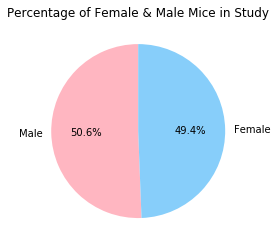

In [196]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for pie chart section
sex = ['Male','Female']

# Values for each section
sizes = [958,935]

# Colors for each section
colors = ['lightpink', 'lightskyblue']

# Creating pie chart based on values above with percentages.
plt.pie(sizes, labels=sex, colors=colors,
        autopct="%1.1f%%", startangle=90)

plt.title("Percentage of Female & Male Mice in Study")

## Quartiles, outliers and boxplots

In [204]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# The four Drug Regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Still trying to figure out how to get only these.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Calulating quartiles for final tumor volume (mm3). Final timepoint is at 45.
# Still working on getting final tumor volume
quartiles = mouse_study_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume (mm3) is: {lowerq}")
print(f"The upper quartile of final tumor volume (mm3) is: {upperq}")
print(f"The interquartile range of final tumor volume (mm3) is: {iqr}")
print(f"The the median of final tumor volume (mm3) is: {quartiles[0.5]} ")

# Checking for outliers for final tumor volume (mm3). Final timepoint is at 45.
# Still working on getting final tumor volume
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = mouse_study_df.loc[(mouse_study_df['Tumor Volume (mm3)'] < lower_bound) | (mouse_study_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_occupancy

The lower quartile of final tumor volume (mm3) is: 45.0
The upper quartile of final tumor volume (mm3) is: 56.29220039
The interquartile range of final tumor volume (mm3) is: 11.292200389999998
The the median of final tumor volume (mm3) is: 48.95147442 
Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
567,a818,Naftisol,Female,12,28,45,74.997764,2
679,c402,Stelasyn,Female,1,27,45,74.040390,3
850,f545,Zoniferol,Female,20,26,45,73.324432,1
930,h246,Ketapril,Male,13,30,45,74.104086,2
1043,k382,Ketapril,Male,22,29,45,73.715619,4


In [211]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Still working on getting final tumor volumeFinal timepoint is at 45.
volume = []

fig1, ax1 = plt.subplots()
ax1.set_title('Promising Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(volume)
plt.show()

SyntaxError: invalid syntax (<ipython-input-211-9fc61916c520>, line 3)

## Line and scatter plots

In [201]:
# Generate a line plot of time point versus tumor volume for a mouse(mouse ID l509) treated with Capomulin
mouse_l509_df = mouse_study_df.groupby(['Mouse ID'])
mouse_l509_df

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse(mouse ID l509) weight and average tumor volume for the Capomulin regimen